In [1]:
#all imports here..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#import plotly.express as px

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score, mutual_info_score

import warnings
warnings.filterwarnings("ignore")

%xmode Minimal
%matplotlib notebook

Exception reporting mode: Minimal


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


formatting to lowercase columns' titles and values

In [5]:
df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['month', 'visitor_type']

In [7]:
for col in strings:
    df[col] = df[col].str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12330 non-null  int64  
 1   administrative_duration   12330 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    12330 non-null  float64
 4   product_related           12330 non-null  int64  
 5   product_related_duration  12330 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   special_day               12330 non-null  float64
 10  month                     12330 non-null  object 
 11  operating_systems         12330 non-null  int64  
 12  browser                   12330 non-null  int64  
 13  region                    12330 non-null  int64  
 14  traffi

In [9]:
df.describe()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<IPython.core.display.Javascript object>


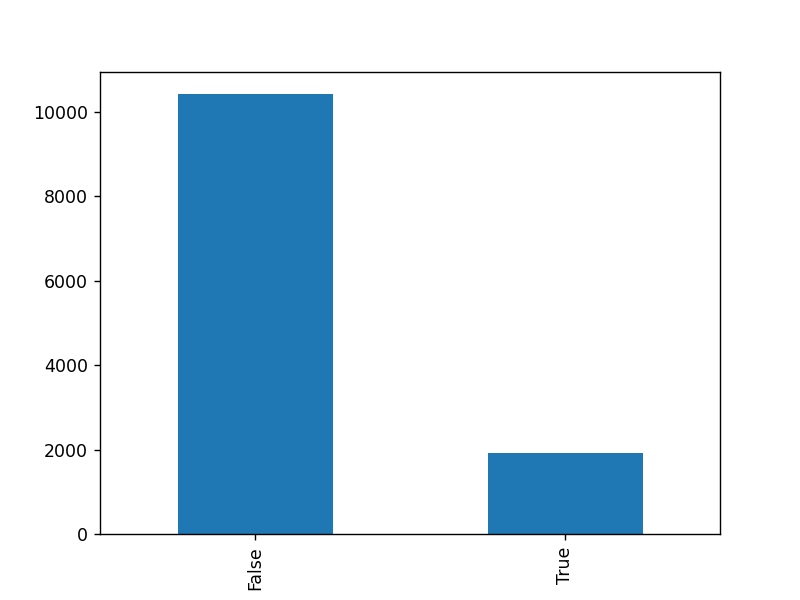

In [10]:
plt.figure()
df['revenue'].value_counts().plot(kind = 'bar')
plt.show()

<li>there are no missing values.</li>
<li>the target class ('revenue') is unbalanced distributed </li>
<li>administrative, informational and product_related are number of pages</li>
<li>operating_system, browser, region, traffic_type are formatted as int64 but can be considered as categorical (they have no ordinal meaning)</li>

<IPython.core.display.Javascript object>


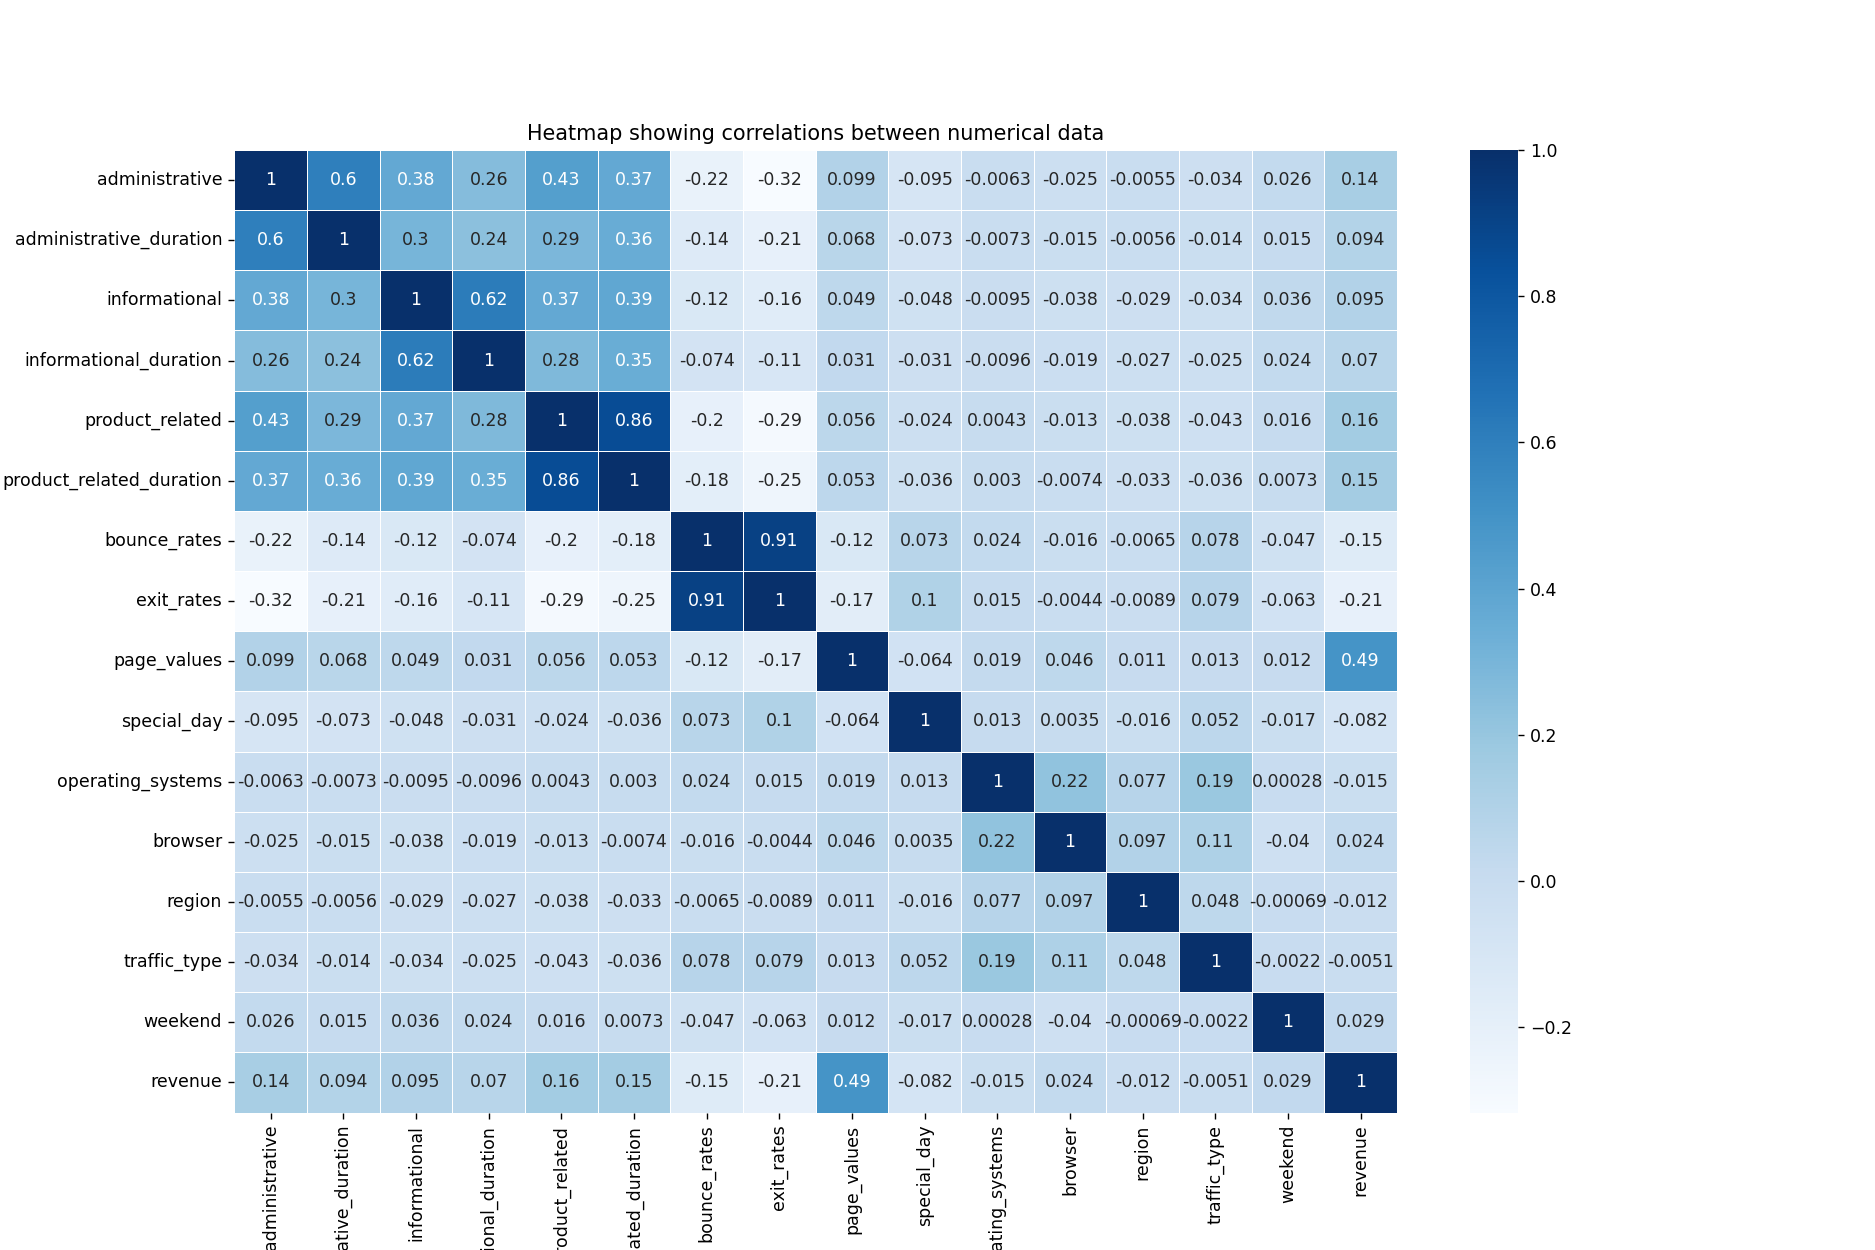

In [11]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [12]:
numeric_features = ['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'product_related', 'product_related_duration',
       'bounce_rates', 'exit_rates', 'page_values', 'special_day',
                    'operating_systems', 'browser', 'region', 'traffic_type']

categorical_features = list(df.dtypes[df.dtypes == 'object'].index)

boolean_features = ['weekend']

len(numeric_features), len(categorical_features), len(boolean_features)

(14, 2, 1)

In [13]:
target_name = 'revenue'  #True if session ended in a buy

data, target = df.drop(columns=target_name), df[target_name]
target = (target == True).astype(int)

data.shape, target.shape

((12330, 17), (12330,))

In [14]:
df_full_train, df_test, y_full_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1,
                                         stratify = target)

df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=1,
                                   stratify = y_full_train)


In [15]:
df_train.shape, df_val.shape, df_test.shape, y_full_train.shape, y_train.shape, y_val.shape, y_test.shape

((7398, 17), (2466, 17), (2466, 17), (9864,), (7398,), (2466,), (2466,))

In [16]:
#one hot encoding of categorical features

dv = DictVectorizer(sparse=False)

train_dict = df_train[numeric_features + categorical_features + boolean_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [17]:
#check: ten months and three types of visitors -> 17 + 13 - 2 = 28 
X_train.shape

(7398, 28)

In [ ]:
dv.feature_names_

In [18]:
val_dict = df_val[numeric_features + categorical_features + boolean_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

**Estimating generalization error via nested cross_val. Note that nested cross-val is time consuming and it is suited for small datasets like ours that is under 10000 rows**

In [19]:
#because we are going to use cross-val there is no need to separate train and val
df_full_train.shape

(9864, 17)

In [20]:
#one hot encoding of categorical features (non need of separated train and val, in view of cross-validation)
dv = DictVectorizer(sparse=False)

train_dict = df_full_train[numeric_features + categorical_features + boolean_features].to_dict(orient='records')
X_full_train = dv.fit_transform(train_dict)

In [21]:
X_full_train.shape

(9864, 28)

In [ ]:
dv.feature_names_

In [22]:
#first model is LogisticRegression()
model_cv = LogisticRegression(solver = 'lbfgs', max_iter = 10_000, 
                              random_state=1)

In [23]:
param_grid = [{
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]}]

In [24]:
# Making a Grid Search for selecting model by hyperparameter tuning, using
# 2-fold StratifiedKFold cross validation

gs = GridSearchCV(estimator=model_cv, param_grid = param_grid,
                 cv = 2, scoring = 'roc_auc')

In [25]:
#(nested) cross validation ( 5 x 2 cross-val: inner = 5 folds, outer = 2 folds). Outer is in the cell above..
scores = cross_val_score(gs, X_full_train, y_full_train, scoring='roc_auc', cv=5, error_score='raise')

# mean scores and standard deviation
print('CV auc_roc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV auc_roc: 0.905 +/- 0.004


In [26]:
#second model is RandomForestClassifier()
model2_cv = RandomForestClassifier(random_state=1)

In [27]:
param_grid = [{
    'max_depth': [10, 15, 20],
    'n_estimators' : [100, 200, 500],
    'min_samples_leaf': [1, 3, 5, 10]}]

In [28]:
gs = GridSearchCV(estimator=model2_cv, param_grid = param_grid,
                 cv = 2, scoring = 'roc_auc')

In [29]:
scores = cross_val_score(gs, X_full_train, y_full_train, scoring='roc_auc', cv=5, error_score='raise')

print('CV auc_roc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV auc_roc: 0.928 +/- 0.004


**Selecting the final model to use in deployment**

after having calculated a robust estimate of the generalization errors of the models, we continue with the better one (RandomForestClassifier), to find his optimal hyperparameters values by means of gridSearchCV, then we will define the best model to export to train.py for the deployment part

In [41]:
gs.fit(X_full_train, y_full_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [10, 15, 20],
                          'min_samples_leaf': [1, 3, 5, 10],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [42]:
gs.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 500}

In [30]:
gs2 = GridSearchCV(estimator=model2_cv, param_grid = param_grid,
                 cv = 5, scoring = 'roc_auc')

In [31]:
gs2.fit(X_full_train, y_full_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [10, 15, 20],
                          'min_samples_leaf': [1, 3, 5, 10],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [32]:
gs2.best_params_

{'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 500}

In [33]:
final_model = RandomForestClassifier(max_depth = 20, n_estimators = 500,
                                    min_samples_leaf = 10, random_state = 1)

In [34]:
final_model.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=500,
                       random_state=1)

In [64]:
final_model.classes_

array([0, 1])

## Bento ML

In [35]:
import bentoml

In [36]:
bentoml.sklearn.save_model(
    'shopper_intention',
    final_model,
    custom_objects={
        'dictVectorizer': dv
    },
    signatures = {
        'predict_proba':{
                'batchable': True,
                'batch_dim': 0
        }        
    }
    )

Model(tag="shopper_intention:ag7pelc6wwet7hil", path="/home/lucapug/bentoml/models/shopper_intention/ag7pelc6wwet7hil/")

Test

In [42]:
test_dict = df_test[numeric_features + categorical_features + boolean_features].to_dict(orient='records')
X_test = dv.fit_transform(train_dict)

In [45]:
X_test.shape

(9864, 28)

In [37]:
import json

In [38]:
request = df_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

{
  "administrative": 7,
  "administrative_duration": 322.25,
  "informational": 1,
  "informational_duration": 0.0,
  "product_related": 121,
  "product_related_duration": 4875.106113,
  "bounce_rates": 0.011806061,
  "exit_rates": 0.020025438,
  "page_values": 0.0,
  "special_day": 0.0,
  "month": "nov",
  "operating_systems": 3,
  "browser": 2,
  "region": 1,
  "traffic_type": 13,
  "visitor_type": "returning_visitor",
  "weekend": false
}


In [109]:
print(y_test[0])

0


In [51]:
final_model.predict_proba([X_test[0,:]])

array([[0.95216717, 0.04783283]])

In [65]:
df.index[df['revenue'] == True].tolist()[0]

65

In [66]:
request = df_test.iloc[65].to_dict()
print(json.dumps(request, indent=2))

{
  "administrative": 0,
  "administrative_duration": 0.0,
  "informational": 0,
  "informational_duration": 0.0,
  "product_related": 38,
  "product_related_duration": 1633.833333,
  "bounce_rates": 0.0,
  "exit_rates": 0.007894737,
  "page_values": 0.0,
  "special_day": 0.0,
  "month": "may",
  "operating_systems": 2,
  "browser": 2,
  "region": 1,
  "traffic_type": 1,
  "visitor_type": "returning_visitor",
  "weekend": true
}


In [67]:
print(y_test[65])

1


In [68]:
final_model.predict_proba([X_test[65,:]])

array([[0.73773183, 0.26226817]])